In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import Binarizer
import numpy as np
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
import scipy.stats as stats
from binance.enums import HistoricalKlinesType
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

from main_funcs import get_and_update_data


In [34]:
df_source = get_and_update_data("BTCUSDT", "4h", HistoricalKlinesType.SPOT,country=None)
df_source = df_source[["open", "high", "low", "close","volume" ]]
# df_source = df_source.iloc[:-4,:]
df_source

,open,high,low,close,volume
open_time,,,,,
2017-08-17 07:30:00,4261.48,4349.99,4261.32,4349.99,82.088865
2017-08-17 11:30:00,4333.32,4485.39,4333.32,4427.30,63.619882
2017-08-17 15:30:00,4436.06,4485.39,4333.42,4352.34,174.562001
2017-08-17 19:30:00,4352.33,4354.84,4200.74,4325.23,225.109716
2017-08-17 23:30:00,4307.56,4369.69,4258.56,4285.08,249.769913
...,...,...,...,...,...
2023-11-14 11:30:00,36683.86,36744.00,36236.36,36259.18,5833.014480
2023-11-14 15:30:00,36259.17,36693.01,35889.00,36147.09,10629.714350
2023-11-14 19:30:00,36147.09,36417.23,34800.00,35293.99,15656.195220


In [35]:
df = df_source.copy()
# df = df.iloc[9000:,:]
df["open_close"] = df.close - df.open
df["open_close_percent"] = df.open_close / df.open
period = 30
for i in range(1,period+1):
    df[f"open_close_percent_{i}"] = df.shift(i).open_close_percent

darsad_target=0.005
df["target"] = df.shift(-1).open_close_percent
df["target"] = np.where(df['target'] > darsad_target, 1, np.where(df['target'] < -darsad_target, -1, 0))
# df["target2"] = np.where( (df['target'] <  0.02) and (df['target'] > -0.02),0, 0 )
# df.dropna(inplace=True)
df.dropna(subset=[f'open_close_percent_{period}'],inplace=True)
df.drop(columns=['open','high','low','close','volume','open_close'],inplace=True)

df

,open_close_percent,open_close_percent_1,open_close_percent_2,open_close_percent_3,open_close_percent_4,open_close_percent_5,open_close_percent_6,open_close_percent_7,open_close_percent_8,open_close_percent_9,...,open_close_percent_22,open_close_percent_23,open_close_percent_24,open_close_percent_25,open_close_percent_26,open_close_percent_27,open_close_percent_28,open_close_percent_29,open_close_percent_30,target
open_time,,,,,,,,,,,,,,,,,,,,,
2017-08-22 07:30:00,-0.016806,-0.038250,-0.002744,0.005257,-0.000276,-0.005075,-0.008734,0.003841,-0.018094,0.009600,...,-0.019356,0.012908,0.001831,0.001706,-0.005219,-0.006227,-0.018873,0.021688,0.020770,1
2017-08-22 11:30:00,0.018009,-0.016806,-0.038250,-0.002744,0.005257,-0.000276,-0.005075,-0.008734,0.003841,-0.018094,...,-0.023204,-0.019356,0.012908,0.001831,0.001706,-0.005219,-0.006227,-0.018873,0.021688,0
2017-08-22 15:30:00,-0.002134,0.018009,-0.016806,-0.038250,-0.002744,0.005257,-0.000276,-0.005075,-0.008734,0.003841,...,-0.006440,-0.023204,-0.019356,0.012908,0.001831,0.001706,-0.005219,-0.006227,-0.018873,1
2017-08-22 19:30:00,0.032660,-0.002134,0.018009,-0.016806,-0.038250,-0.002744,0.005257,-0.000276,-0.005075,-0.008734,...,0.007346,-0.006440,-0.023204,-0.019356,0.012908,0.001831,0.001706,-0.005219,-0.006227,1
2017-08-22 23:30:00,0.013929,0.032660,-0.002134,0.018009,-0.016806,-0.038250,-0.002744,0.005257,-0.000276,-0.005075,...,-0.025379,0.007346,-0.006440,-0.023204,-0.019356,0.012908,0.001831,0.001706,-0.005219,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-14 11:30:00,-0.011577,0.006469,-0.000408,-0.010369,0.000084,0.000866,-0.004065,0.001254,-0.004050,-0.001101,...,0.003879,0.000298,0.017319,-0.007984,0.000877,0.008765,-0.018925,0.007562,0.007463,0
2023-11-14 15:30:00,-0.003091,-0.011577,0.006469,-0.000408,-0.010369,0.000084,0.000866,-0.004065,0.001254,-0.004050,...,0.002033,0.003879,0.000298,0.017319,-0.007984,0.000877,0.008765,-0.018925,0.007562,-1
2023-11-14 19:30:00,-0.023601,-0.003091,-0.011577,0.006469,-0.000408,-0.010369,0.000084,0.000866,-0.004065,0.001254,...,-0.007015,0.002033,0.003879,0.000298,0.017319,-0.007984,0.000877,0.008765,-0.018925,1


In [36]:
from sklearn.neighbors import KNeighborsClassifier

# model

# all ok rows and columns
x_ok = df.iloc[:-1,:-1]
y_ok = df.iloc[:-1,-1:]
# fit data count
num = int(len(df)*0.7)
# fit data
x = x_ok[:num]
y = y_ok[:num]
# fit validator
X = x_ok[num:]
Y = y_ok[num:]



rfc_clf = RandomForestClassifier(n_estimators=2000, bootstrap=True, oob_score=True)
rfc_clf.fit(x.to_numpy(), y.to_numpy().ravel())



RandomForestClassifier(n_estimators=2000, oob_score=True)

In [37]:
# print(df.iloc[-1:,:-1])
# svm_classifier.predict(df.iloc[-1:,:-1])

In [38]:
Y_RESULT = rfc_clf.predict(X.to_numpy())

In [39]:
print(metrics.classification_report(Y,Y_RESULT))

              precision    recall  f1-score   support

          -1       0.39      0.07      0.12       862
           0       0.62      0.93      0.74      2373
           1       0.36      0.15      0.22       856

    accuracy                           0.59      4091
   macro avg       0.46      0.38      0.36      4091
weighted avg       0.52      0.59      0.50      4091


[[  61  693  108]
 [  45 2208  120]
 [  52  673  131]]


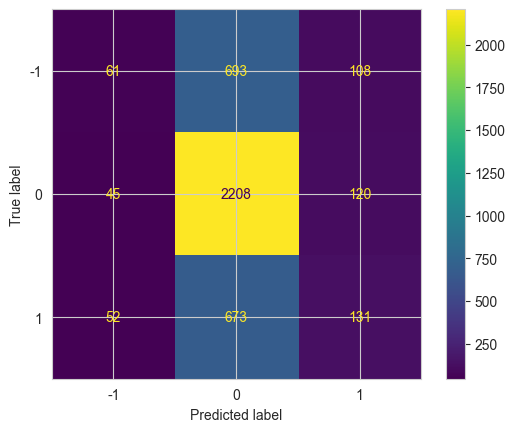

In [40]:
cm = metrics.confusion_matrix(Y, Y_RESULT, labels=rfc_clf.classes_)
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rfc_clf.classes_)
disp.plot()
plt.show()